# Customer Cohort and RFM Analysis

### Cohort
A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

**Types of cohorts:**

`Time Cohorts` are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.

`Behaovior cohorts` are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.

`Size cohorts` refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.


### RFM (Recency, Frequency, Monetary)
analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

`RECENCY (R)`: Days since last purchase

`FREQUENCY (F)`: Total number of purchases

`MONETARY VALUE (M)`: Total money this customer spent.

**In this Project, we will be implementing the concepts of Cohort and RFM analysis for our data set to gain the Insights that drives the business.**

## 1. Importing the necessary libraries

In [346]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
from datetime import datetime,date, timedelta


## 2. Reading the Data
The Data is collected from the UCI repository. https://archive.ics.uci.edu/dataset/502/online+retail+ii

The data set named Online Retail - II includes the sales of an online store between 01/12/2009 - 09/12/2011.

The majority of the company's customers are corporate customers.
Variables Description:

`InvoiceNo` : The number of the invoice, unique per each purchase. Refund invoice numbers contain "C"

`StockCode` : Unique code per each item

`Description` : Name of the item

`Quantity` : The number of items within the invoice

`InvoiceDate` : Date and time of the purchase

`UnitPrice` : Price of a single item, as of Sterlin

`CustomerID` : Unique id number per each customer

`Country` : The country where the customer is living

In [347]:
data = pd.read_excel(r"C:\Users\prasa\Dropbox\PC\Desktop\Power BI\Projects\Customer Cohort Analysis\online_retail_II.xlsx",
                    parse_dates=["InvoiceDate"])
data.shape

(525461, 8)

In [348]:
data['InvoiceDate'] = data['InvoiceDate'].dt.date
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
19294,490972,82613D,METAL SIGN CUPCAKE SINGLE HOOK,16,2009-12-08,1.25,14911.0,EIRE
436320,531036,71495B,CD WALL TIDY RED FLOWERS,1,2010-11-05,0.84,NaN,United Kingdom
402594,527951,22594,CHRISTMAS GINGHAM TREE,1,2010-10-19,1.66,NaN,United Kingdom


## 3. Understanding the data

In [349]:
# Check for nulls
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Null records in Customer ID doesn;t contribute to our analysis. So neglecting the null values in the data

In [350]:
# Dropping NULL records
data.dropna(inplace=True)
data.shape

(417534, 8)

In [351]:
# Summary of our data
data.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


Found some records with -ve quantity, This might be a refund scenario. 
We will not be considering these type of records in the RFM analysis/ Cohort analysis. Removing those records from consideration.

`Customer ID` is unique identifier for the customer. Better to treat the `Customer ID` as a categorical value instead of numerical entity

In [352]:
# Let's consider the reocrds with atleast 1 product purchase
data['Customer ID'] = data['Customer ID'].astype(str)
data = data[data['Quantity']>0]
data.shape

(407695, 8)

In [353]:
print("Summary of our data: ")
print("Total no of distinct customers: ",data['Customer ID'].nunique())
print("Total no of Transactions are: ", data['Invoice'].nunique())
print("Distinct Products available are: ", data['StockCode'].nunique())
print("Business is expanded in {} countries".format(data['Country'].nunique()))

Summary of our data: 
Total no of distinct customers:  4314
Total no of Transactions are:  19215
Distinct Products available are:  4017
Business is expanded in 37 countries


In [354]:
# Little more EDA -- Understanding the business base
temp = pd.DataFrame(data.groupby("Country")['Customer ID'].agg("nunique").sort_values(ascending=False)).reset_index()
temp['Customer %'] = temp['Customer ID'].apply(lambda x: x*100.0/data['Customer ID'].nunique())
temp

,Country,Customer ID,Customer %
0,United Kingdom,3971,92.049142
1,Germany,67,1.553083
2,France,47,1.089476
3,Spain,25,0.579509
4,Netherlands,22,0.509968
5,Portugal,18,0.417246
6,Belgium,17,0.394066
7,Sweden,16,0.370885
8,Australia,15,0.347705
9,Switzerland,14,0.324525


In [355]:
temp = pd.DataFrame(data.groupby("Country")[['Customer ID',"Price"]].agg({"Customer ID":"nunique",
                                                                  "Price":"sum"})).reset_index().sort_values(
                                                                                   by ="Price", ascending=False)
temp['Customer %'] = temp['Customer ID'].apply(lambda x: x*100.0/data['Customer ID'].nunique())
temp['Amount %'] = temp['Price'].apply(lambda x:x*100.0/data['Price'].sum())
temp

,Country,Customer ID,Price,Customer %,Amount %
34,United Kingdom,3971,1166722.403,92.049142,86.872803
9,EIRE,5,51508.010,0.115902,3.835227
12,Germany,67,26487.111,1.553083,1.972200
11,France,47,22142.460,1.089476,1.648702
23,Norway,5,14736.240,0.115902,1.097243
21,Netherlands,22,7424.490,0.509968,0.552819
28,Spain,25,6276.830,0.579509,0.467366
3,Belgium,17,5631.830,0.394066,0.419340
30,Switzerland,14,5140.850,0.324525,0.382782
29,Sweden,16,4756.540,0.370885,0.354166


**92 % of the Customers are from UK and UK accounts for 87 % of the total revenue.**

## 4. Performing the Cohort Analysis
For cohort analysis, there are a few labels that we have to create:

`Invoice Month:` A string representation of the start date of the month of a single transaction/invoice.

`Cohort group:` A string representation of the start date of the month of a customer’s first purchase. This label is common across all invoices for a particular customer.

`Life time:` The number represents the number of months passed since the first purchase.

### 4.1. Data Preparation

In [356]:
# Creating the Customer_df data frame that contains the info about the customers and their Cohort groups
customer_df = data.groupby("Customer ID")["InvoiceDate"].min().reset_index()
customer_df.rename({"InvoiceDate": "First transaction date"},axis=1,inplace=True)
customer_df["First transaction date"] =pd.to_datetime(customer_df["First transaction date"])
customer_df["Cohort group"] = customer_df["First transaction date"].dt.to_period("M").dt.to_timestamp()
customer_df

,Customer ID,First transaction date,Cohort group
0,12346.0,2009-12-14,2009-12-01
1,12347.0,2010-10-31,2010-10-01
2,12348.0,2010-09-27,2010-09-01
3,12349.0,2010-04-29,2010-04-01
4,12351.0,2010-11-29,2010-11-01
...,...,...,...
4309,18283.0,2010-02-19,2010-02-01
4310,18284.0,2010-10-04,2010-10-01
4311,18285.0,2010-02-17,2010-02-01
4312,18286.0,2009-12-16,2009-12-01


In [357]:
# Creating the copy of our original data frame which can be retained for future purpose, if needed
df = data.copy()

In [358]:
# Modifying the Data Frame such that it contains the desired info for performing our Cohort Analysis
df = df.merge(customer_df,on="Customer ID",how='left')
df = df[['Invoice' ,'Quantity', 'InvoiceDate',
       'Price', 'Customer ID',"First transaction date","Cohort group"]]
df["InvoiceMonth"] = pd.to_datetime(df["InvoiceDate"]).dt.to_period("M").dt.to_timestamp()
df["Life time"] = (df["InvoiceMonth"].dt.year - df["Cohort group"].dt.year) *12 + df["InvoiceMonth"].dt.month - df["Cohort group"].dt.month
df

,Invoice,Quantity,InvoiceDate,Price,Customer ID,First transaction date,Cohort group,InvoiceMonth,Life time
0,489434,12,2009-12-01,6.95,13085.0,2009-12-01,2009-12-01,2009-12-01,0
1,489434,12,2009-12-01,6.75,13085.0,2009-12-01,2009-12-01,2009-12-01,0
2,489434,12,2009-12-01,6.75,13085.0,2009-12-01,2009-12-01,2009-12-01,0
3,489434,48,2009-12-01,2.10,13085.0,2009-12-01,2009-12-01,2009-12-01,0
4,489434,24,2009-12-01,1.25,13085.0,2009-12-01,2009-12-01,2009-12-01,0
...,...,...,...,...,...,...,...,...,...
407690,538171,2,2010-12-09,2.95,17530.0,2009-12-06,2009-12-01,2010-12-01,12
407691,538171,1,2010-12-09,3.75,17530.0,2009-12-06,2009-12-01,2010-12-01,12
407692,538171,1,2010-12-09,3.75,17530.0,2009-12-06,2009-12-01,2010-12-01,12
407693,538171,2,2010-12-09,3.75,17530.0,2009-12-06,2009-12-01,2010-12-01,12


### 4.2. Creating the Cohort

<AxesSubplot:xlabel='Life time', ylabel='Cohort group'>

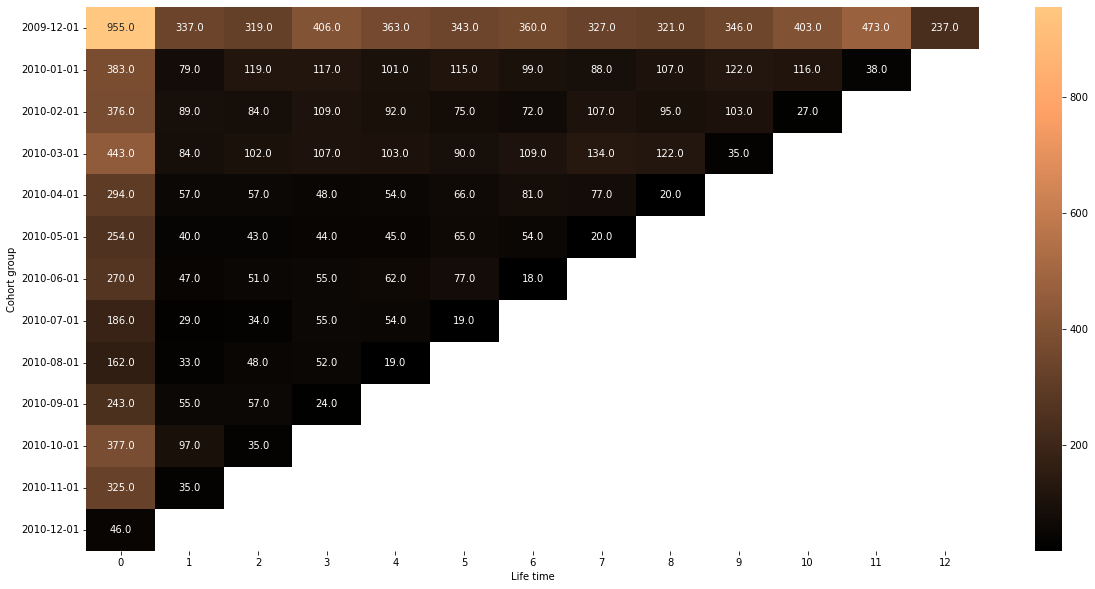

In [359]:
# Cohort creation
df["Cohort group"] = df["Cohort group"].apply(lambda x : str(x).split(" ")[0])
temp = df.groupby(["Cohort group","Life time"])["Customer ID"].nunique().reset_index()
pivoted_data = temp.pivot(index="Cohort group",columns="Life time",values="Customer ID")
plt.figure(figsize=(20,10))
sb.heatmap(round(pivoted_data,0),annot=True,fmt="",cmap="copper")

<AxesSubplot:xlabel='Life time', ylabel='Cohort group'>

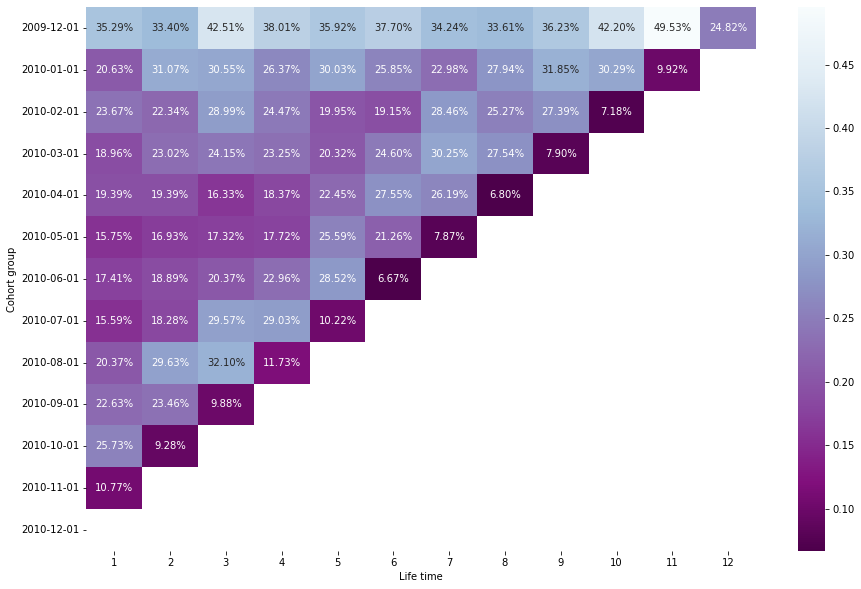

In [360]:
# Retention percentage analysis 
plt.figure(figsize=(15,10))
sb.heatmap(pivoted_data.iloc[0:,1:].divide(pivoted_data.iloc[:,0],axis=0),annot=True,cmap="BuPu_r",fmt=".2%")


**Strong Initial Cohorts:** Cohorts from the earlier months, such as "2009-12-01" and "2010-01-01," exhibit higher initial customer counts. For instance, the "2009-12-01" cohort started with 98,310 customers. This suggests successful customer acquisition strategies during those months.

**Retention Variability:** Retention rates vary across cohorts and months. The "2009-12-01" cohort, for example, shows a general decline over time, while the "2010-03-01" cohort experienced fluctuation but improved retention in later months.

**Long-Term Engagement:** Some cohorts display sustained engagement. The "2009-12-01" cohort, despite an initial drop, maintains a considerable number of customers throughout the first year. This indicates a strong appeal of the product/service over time.

**Challenges in Later Cohorts:** Cohorts with more recent acquisition dates, like "2010-10-01" and beyond, show lower retention rates, indicating potential challenges in retaining customers for those cohorts. For instance, the "2010-10-01" cohort has lower counts in subsequent months, indicating a need to improve customer retention strategies for more recent customers.







<AxesSubplot:xlabel='InvoiceMonth'>

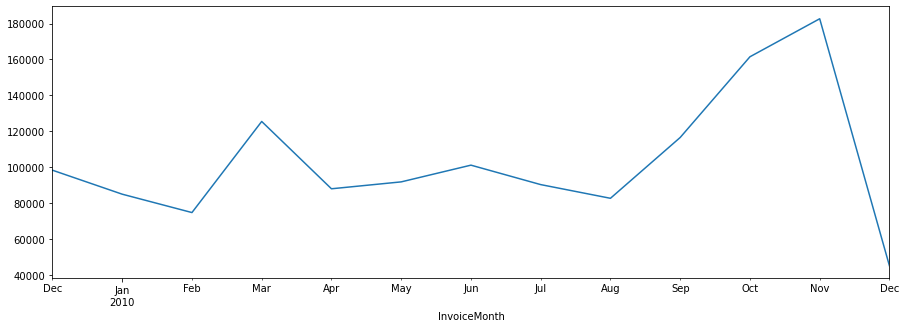

In [361]:
# Business over time 
df["InvoiceMonth"] =  pd.to_datetime(df["InvoiceMonth"])
plt.figure(figsize=(15,5))
df.groupby("InvoiceMonth")["Price"].sum().plot()

<AxesSubplot:xlabel='InvoiceMonth'>

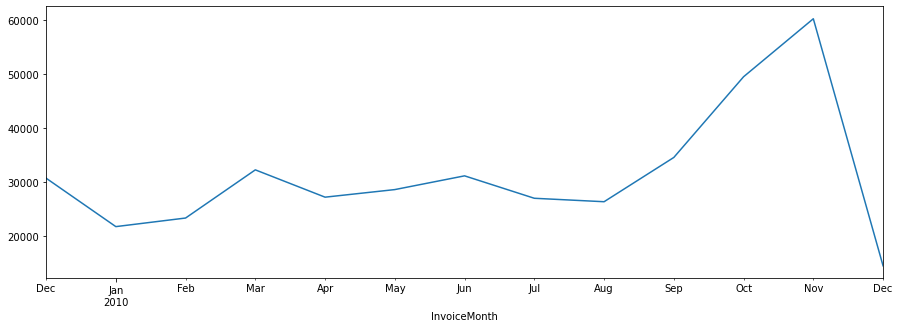

In [362]:
# Customers flow over time 
df["InvoiceMonth"] =  pd.to_datetime(df["InvoiceMonth"])
plt.figure(figsize=(15,5))
df.groupby("InvoiceMonth")["Customer ID"].count().plot()

<AxesSubplot:xlabel='InvoiceMonth'>

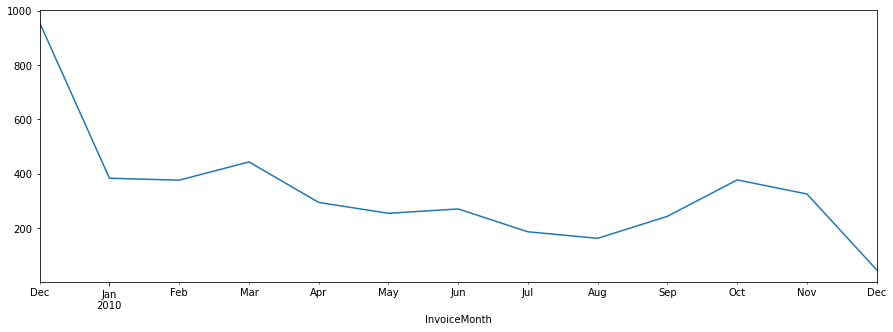

In [363]:
# New Customers flow over time 
temp = df[df["Life time"]==0][["InvoiceMonth","Customer ID"]]
temp["InvoiceMonth"] =  pd.to_datetime(df["InvoiceMonth"])
plt.figure(figsize=(15,5))
temp.groupby("InvoiceMonth")["Customer ID"].nunique().plot()

## 5. Insights from the Analysis so far.....
**Early Success and Revenue Generation:** The initial months, especially "2009-12-01" and "2010-01-01," saw strong revenue generation despite having a smaller number of customers. This indicates higher purchasing activity among early customers, possibly due to novelty or specific marketing efforts.

**Growth in Customer Base:** The customer base expanded significantly over the first year, with a notable spike in "2010-10-01" and "2010-11-01" cohorts. This suggests successful customer acquisition strategies during those periods.

**Retained Customer Impact:** The connection between revenue and retained customers becomes apparent when examining revenue alongside the previously mentioned retention counts. Cohorts with higher retention counts, like "2009-12-01" and "2010-03-01," correspondingly contribute more to revenue over time.


## 6. Recommendations from our Analysis
**Leverage Early Success Strategies:** Build upon the success of your initial months by identifying the factors that led to higher revenue despite having a smaller customer base. Analyze the marketing campaigns, product features, or customer engagement tactics that resonated with early adopters. Apply these insights to attract and engage new customers effectively.

**Strengthen Customer Retention Efforts:** Focus on improving customer retention for cohorts with lower retention rates, particularly the "2010-10-01" and "2010-11-01" cohorts. Implement personalized communication, loyalty programs, or product enhancements to keep customers engaged and satisfied over time. A higher retention rate can significantly impact long-term revenue.

**Consistent New Customer Acquisition:** Maintain your consistent new customer acquisition strategy to ensure a steady flow of fresh customers. Even in later months, the "2010-12-01" cohort showed potential. This suggests that there's ongoing interest in your offerings. Continue refining your targeting and marketing channels to attract potential customers.

**Segmented Strategies:** Tailor your strategies to different customer segments. Some cohorts might be more responsive to certain marketing approaches or product features. By segmenting your customer base and customizing your efforts, you can enhance customer satisfaction and retention.

**Feedback-Driven Improvements:** Continuously iterate and improve your products and services based on customer feedback. Engage with customers to understand their pain points and suggestions for improvement. This iterative process can help maintain customer satisfaction and drive long-term growth.

## 7. RFM Analysis
`RECENCY (R)`: Days since last purchase

`FREQUENCY (F)`: Total number of purchases

`MONETARY VALUE (M)`: Total money this customer spent.

We will create those 3 customer attributes for each customer.

### 7.1. Recency

In [364]:
# Reference date
ref_date = data['InvoiceDate'].max() + timedelta(10)
ref_date


datetime.date(2010, 12, 19)

In [365]:
recency_df = pd.DataFrame(data.groupby("Customer ID")['InvoiceDate'].max()).reset_index()
recency_df['recency_days'] = recency_df['InvoiceDate'].apply(lambda x: ref_date-x)
recency_df['recency_days'] = recency_df['recency_days'].apply(lambda x:int(str(x).split(" ")[0]))
recency_df.columns = ['Customer ID',"Last Purchase Date", "Recency_days"]
recency_df

,Customer ID,Last Purchase Date,Recency_days
0,12346.0,2010-06-28,174
1,12347.0,2010-12-07,12
2,12348.0,2010-09-27,83
3,12349.0,2010-10-28,52
4,12351.0,2010-11-29,20
...,...,...,...
4309,18283.0,2010-11-22,27
4310,18284.0,2010-10-04,76
4311,18285.0,2010-02-17,305
4312,18286.0,2010-08-20,121


###  7.2. Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [366]:
frequency_df = data.groupby("Customer ID")['Invoice'].nunique().reset_index()
frequency_df.rename({"Invoice":"Frequency"},axis=1,inplace=True)
frequency_df.sample(5)

,Customer ID,Frequency
318,12842.0,2
2135,15311.0,121
4198,18119.0,1
4003,17855.0,1
640,13276.0,3


### 7.3 Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [367]:
data['Total_Spent'] = data['Quantity']*data['Price']
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Spent
28717,491803,85099B,JUMBO BAG RED WHITE SPOTTY,10,2009-12-14,1.95,16327.0,United Kingdom,19.5
234477,512096,84950,ASSORTED COLOUR T-LIGHT HOLDER,6,2010-06-13,0.85,17969.0,United Kingdom,5.1
6558,489900,22178,VICTORIAN GLASS HANGING T-LIGHT,24,2009-12-03,1.25,14771.0,United Kingdom,30.0


In [368]:
monetary_df = data.groupby("Customer ID")['Total_Spent'].sum().reset_index()
monetary_df.rename({"Total_Spent":"Monetary"},axis=1, inplace=True)
monetary_df.sample(5)

,Customer ID,Monetary
3449,17126.0,1065.69
4307,18280.0,307.55
1391,14312.0,1478.70
4208,18137.0,145.99
1320,14219.0,543.89


### 7.4. RFM Data FRame

In [369]:
RFM_df = frequency_df.merge(recency_df,on="Customer ID").merge(monetary_df,on="Customer ID")
RFM_df = RFM_df[["Customer ID","Frequency","Recency_days","Monetary"]]
RFM_df

,Customer ID,Frequency,Recency_days,Monetary
0,12346.0,11,174,372.86
1,12347.0,2,12,1323.32
2,12348.0,1,83,222.16
3,12349.0,3,52,2671.14
4,12351.0,1,20,300.93
...,...,...,...,...
4309,18283.0,6,27,641.77
4310,18284.0,1,76,461.68
4311,18285.0,1,305,427.00
4312,18286.0,2,121,1296.43


### 7.5. RFM Scoring
RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category except the Recency. In the case of Recency reverse scoring will be provided. 
The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score should be given as 4 to represent best customers.

In [370]:
RFM_df["Monetary_Q"] =  pd.qcut(RFM_df['Monetary'],5,[1,2,3,4,5])
RFM_df["Recency_days_Q"] =  pd.qcut(RFM_df['Recency_days'],5,[5,4,3,2,1])
RFM_df["Frequency_Q"] =  pd.qcut(RFM_df['Frequency'].rank(method="first"),5,[1,2,3,4,5])
RFM_df.sample(5)

,Customer ID,Frequency,Recency_days,Monetary,Monetary_Q,Recency_days_Q,Frequency_Q
3782,17560.0,4,40,1040.85,4,4,4
1432,14379.0,2,38,920.81,3,4,2
724,13406.0,2,72,568.92,3,3,2
3062,16585.0,2,238,341.59,2,1,3
1116,13944.0,1,298,200.43,1,1,1


In [371]:
# Combine the Quantiles
RFM_df['RFM Score'] = RFM_df.apply(lambda x: str(x["Recency_days_Q"]).split(".")[0] + str(x["Frequency_Q"])+str(x['Monetary_Q']),axis=1)
RFM_df['RF Score'] = RFM_df.apply(lambda x: str(x["Recency_days_Q"]).split(".")[0] + str(x["Frequency_Q"]),axis=1)

RFM_df.sample(5)

,Customer ID,Frequency,Recency_days,Monetary,Monetary_Q,Recency_days_Q,Frequency_Q,RFM Score,RF Score
2126,15299.0,6,17,3484.53,5,5,5,555,55
3429,17096.0,7,28,2737.05,5,4,5,455,45
1736,14771.0,2,266,594.62,3,1,3,133,13
2316,15574.0,3,17,816.45,3,5,3,533,53
3985,17827.0,1,266,392.59,2,1,2,122,12


In [380]:
# Creating the Segments using Regular expressions
segments = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': "Can't loose",
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyal Customers',
    r'5[4-5]': 'Champions'
}

In [381]:
# Assigning the segments
RFM_df["Customer Segment"] = RFM_df["RF Score"].replace(segments,regex=True)
RFM_df.sample(4)

,Customer ID,Frequency,Recency_days,Monetary,Monetary_Q,Recency_days_Q,Frequency_Q,RFM Score,RF Score,Customer Segment
3191,16772.0,3,68,3723.55,5,3,4,345,34,Loyal Customers
399,12953.0,1,167,498.96,2,2,1,212,21,Hibernating
1483,14446.0,1,31,201.73,1,4,1,411,41,Promising
694,13362.0,3,23,2303.33,5,5,3,535,53,Potential Loyal Customers


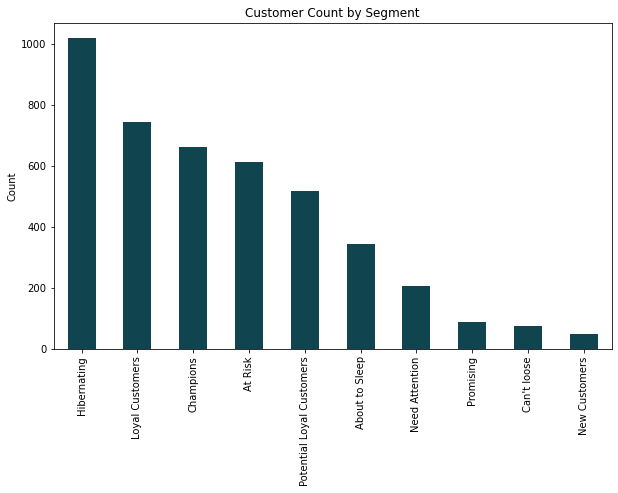

In [399]:
# Analyze the customers distribution 
plt.figure(figsize=(10,6))
RFM_df["Customer Segment"].value_counts().plot(kind='bar',color="#10454F")
plt.title("Customer Count by Segment")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Amount')

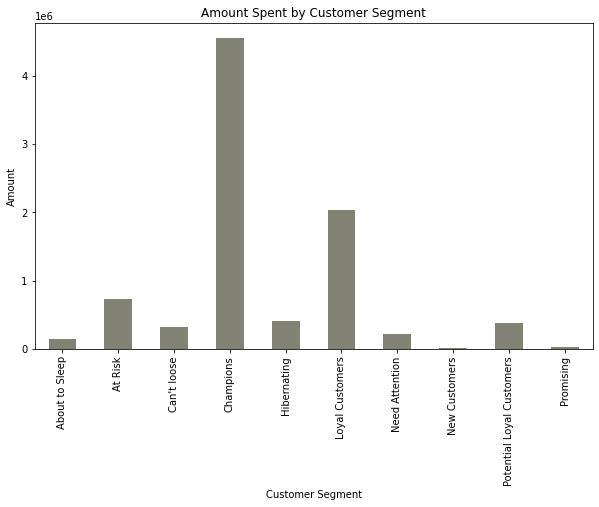

In [397]:
# Analysing the Customer Spent by Segment 
plt.figure(figsize=(10,6))
RFM_df.groupby("Customer Segment")['Monetary'].sum().plot(kind='bar',color="#818274")
plt.title("Amount Spent by Customer Segment")
plt.ylabel("Amount")
plt.show()

### Analysis and Recommendations

**Champions (663 customers):** These are your high-value, highly engaged customers. They generate substantial revenue (approx. $4,543,051) and exhibit consistent purchasing behavior. Focus on nurturing these customers and offering them personalized experiences to maintain their loyalty.

**Loyal Customers (742 customers):** While not as high in revenue as Champions, Loyal Customers still contribute significantly (approx. $2,037,582). They showcase steady engagement and repeat purchases. Continue catering to their preferences to ensure continued loyalty.

**Potential Loyal Customers (517 customers):** These customers show promise with their revenue contribution (approx. $377,157), but there's room for growth. Invest in targeted marketing and engagement strategies to encourage repeat purchases and elevate them to Loyal or Champion status.



**At Risk (611 customers):** These customers have generated substantial revenue (approx. $726,405), but their engagement might be declining. Implement re-engagement campaigns, special offers, or personalized recommendations to prevent them from lapsing.




**Hibernating (1017 customers): While the revenue contribution (approx. $410,038) is notable, these customers show low recent engagement. Rekindle their interest through tailored campaigns, showcasing new offerings or reminding them of their past positive experiences.



**About to Sleep (343 customers):** Although the revenue contribution (approx. $151,373) is moderate, these customers might be slipping away. Reach out with targeted communications to awaken their interest and prevent them from becoming dormant.

**Need Attention (207 customers):** Despite a moderate revenue contribution (approx. $219,494), these customers exhibit signs of waning engagement. Address their needs promptly, offering personalized incentives to re-engage them.

**Promising (87 customers):** These customers have potential with a revenue contribution (approx. $31,937). Nurture them with personalized interactions, providing value to elevate their engagement and purchasing frequency.

**Can't Lose (77 customers):** While the customer count is low, their revenue contribution (approx. $315,658) is significant. Treat them as VIPs, offering exclusive experiences and tailored solutions to reinforce their loyalty.

**New Customers (50 customers):** These customers are in the early stages, with a revenue contribution (approx. $19,310). Focus on providing exceptional onboarding experiences to convert them into higher-value segments.

## 8. Conclusion
The combined analysis of customer cohorts and RFM segments provides valuable insights for our business. By understanding customer behavior over time, we identified successful acquisition periods and challenges in retention. The RFM segmentation revealed distinct customer groups, such as high-value Champions and potential Loyal Customers. These insights enable us to tailor strategies, focus on high-value segments, re-engage at-risk customers, and allocate resources effectively. Ultimately, our data-driven approach empowers us to enhance customer loyalty, optimize revenue, and shape targeted marketing efforts for sustainable growth.